# Project: Chet's No-Show Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling pt. 1">Data Wrangling (Part 1)</a></li>
<li><a href="#wrangling">Data Wrangling pt. 2</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>For my Data Analysis project I selected the "No-show appointments" dataset which includes information about whether or not patients show up to their appointments in Brazil. The dataset has over 100,000 rows and 14 fields.  

> Given the data I want to know which features have a significant impact on whether a patient shows up to their appointment or not. The report is broken down in to four sections:

>> 1) **Data Wrangling (Part 1)**: Cleaning the data set i.e. date, age  

>> 2) **Data Wrangling (Part 2)**: Adding/Removing features

>> 3) **Exploratory Data Analysis**: Visual displays demonstrating the probability of showing depending on different variables

>> 4) **Conclusion**: Highlighting variables I believe have the greatest influence on whether a patient shows up or not

>I hope you enjoy reading my analysis and maybe even learn a thing or two :)

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling pt. 1'></a>
## Data Wrangling (Part 1)

##### The following steps focus on cleaning the data so it can be used for analysis.

In [248]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Visually the data seems quite clean except for the "ScheduledDay" and "AppointmentDay" fields which have a "T" and a "Z". Before I clean these fields I want to know 1) the data type of every field and 2) whether there are any nulls in the data.

In [249]:
df.info() #tells us the type of each field
df.isnull().sum() #sums the total number of nulls in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The above steps tell us there are no nulls in the dataset. We also learn that the "ScheduledDate" and "AppointmentDate" are integers however, they will need to converted to a datetime format.

##### Converting to Datetime

In [250]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)
 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### Change 'No-show' to 'No_show"

In [251]:
df.rename(columns= {'No-show': "No_show"}, inplace = True)

Due to the hypen 'No-show' is difficult to call via attribute access therefore we changed it's name.

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


"ScheduledDay" and "AppointmentDay" have now been converted into a datetime format and in doing so the fields have been cleaned as well i.e. "Z" and "T" have been removed.

Next we want to get a numeric sense of our data which we can get by pulling the summary statistics (below). 

In [253]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the above we learn a few things about the population:

 1) ~10% received scholarships <br/>
 2) ~20% suffer from Hipertension <br/>
 3) ~7% have diabetes <br/>
 4) ~3% suffer from alcoholism <br/>
 5) ~2.2% are handicapped <br/>
 6) ~32% received an SMS reminding them about their appointment <br/>
 
We can also see the ages of the population range from -1 to 115. Since a person cannot be less than 0 years old and 115 years seems too high we want to isolate the population to an acceptable range i.e. 0 - 100 years. 

Additionally, 'Handcap' (Handicap) values range from 0 to 4 but since we're only interested whether in whether a patient is handicapped or not we'll convert all values greater than 1 to 1. (Assuming values greater than 1 mean the indivudal is handicapped).  

##### Remove Age Outliers

In [254]:
df = df[(df.Age >= 0) & (df.Age <= 100)]
print(df.Age.count())

110519


8 outliers (110527 - 110519) have been removed

##### Handicapped

In [255]:
for row in df['Handcap']:
    if row >1:
        row = 1
        
print(set(df['Handcap']))#This script tries to convert all values to either 1 or 0 but does not work. Can you help exaplin why?  

set([0, 1, 2, 3, 4])


In [256]:
df['Handcap'] = (df['Handcap'] >= 1).astype(int)
print(set(df['Handcap']))  

set([0, 1])


All values have been converted to 1 or 0

<a id='wrangling pt. 2'></a>
## Data Wrangling (Part 2)

##### The second part of the wrangling process focuses on manipulating existing colums to create additional fields we'll require for our analysis and removing any fields that won't benefit us.

In [257]:
df['AppointmentYear']= df['AppointmentDay'].dt.year
df['AppointmentMonth']= df['AppointmentDay'].dt.month
df['Appointment_dayofweek'] = df['AppointmentDay'].dt.weekday_name

In [258]:
df.drop(['PatientId','AppointmentID'],axis = 1, inplace = True)

In [259]:
df.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,AppointmentYear,AppointmentMonth,Appointment_dayofweek
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,Friday
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2016,4,Friday
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016,4,Friday
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016,4,Friday
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,2016,4,Friday
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2016,4,Friday


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [260]:
def probStatus(dataset, group_by):
    df = pd.crosstab(index = dataset[group_by], columns = dataset.No_show).reset_index()
    df['probShowUp'] = df['No'] / (df['Yes'] + df['No'])
    return df[[group_by, 'probShowUp']]

print(probStatus(df,'Age'))

No_show  Age  probShowUp
0          0    0.819441
1          1    0.817422
2          2    0.844252
3          3    0.816920
4          4    0.782910
5          5    0.785091
6          6    0.792242
7          7    0.789068
8          8    0.776685
9          9    0.734694
10        10    0.761381
11        11    0.793305
12        12    0.750916
13        13    0.725295
14        14    0.717352
15        15    0.734104
16        16    0.748217
17        17    0.737575
18        18    0.764627
19        19    0.744984
20        20    0.752958
21        21    0.755510
22        22    0.744913
23        23    0.745738
24        24    0.741546
25        25    0.735736
26        26    0.756820
27        27    0.761075
28        28    0.770718
29        29    0.764790
..       ...         ...
71        71    0.825899
72        72    0.835772
73        73    0.867586
74        74    0.852159
75        75    0.851103
76        76    0.840630
77        77    0.850095
78        78    0.835490


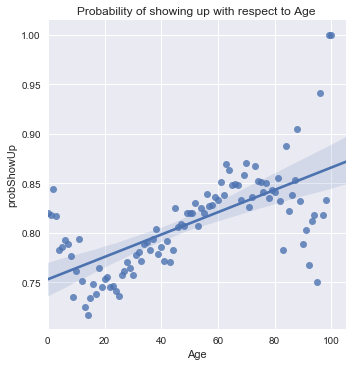

In [261]:
sns.lmplot(data = probStatus(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
sns.plt.xlim(0, 105)
sns.plt.title('Probability of showing up with respect to Age')
sns.plt.show()


In [262]:
def probStatusCategorical(items):
    rows = []
    for item in items:
        for resp_val in df[item].unique():
            row = {'Condition': item} 
            total = len(df[df[item] == resp_val]) #counts the number of '1' and '0'
            n = float(len(df[(df[item] == resp_val) & (df.No_show == 'No')])) #number of people who either got a text or not and showed up
            row.update({'Level': resp_val, 'Probability': n/total})
            rows.append(row)
    return pd.DataFrame(rows)

probStatusCategorical(['SMS_received'])

,Condition,Level,Probability
0,SMS_received,0,0.832991
1,SMS_received,1,0.724247


In [263]:
list(probStatusCategorical(['SMS_received'])['Probability'])

[0.83299128441589598, 0.7242467799667428]

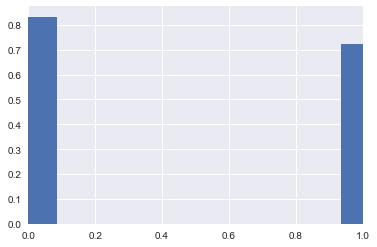

In [264]:
from numpy import arange
fig, ax = plt.subplots()
bar_positions = arange(2) + 0.01
ax.bar(bar_positions,height = probStatusCategorical(['SMS_received'])['Probability'], width = .15)
ax.set_xlim([0,1])
plt.show()


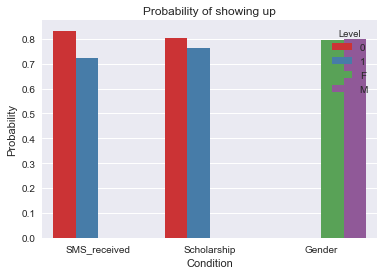

In [265]:
sns.barplot(data = probStatusCategorical(['SMS_received','Scholarship','Gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set1' )
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

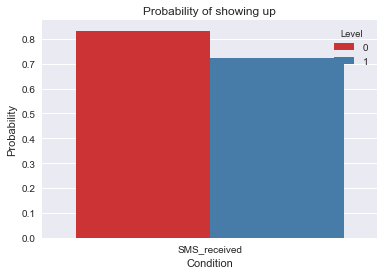

In [266]:
sns.barplot(data = probStatusCategorical(['SMS_received']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set1' )
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

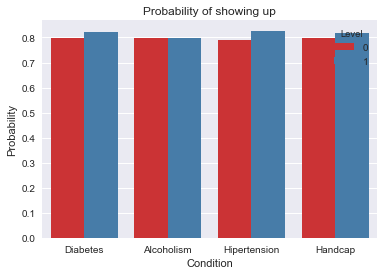

In [267]:
sns.barplot(data = probStatusCategorical(['Diabetes', 'Alcoholism', 'Hipertension',
                                         'Handcap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set1' )
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

In [268]:
def probStatus(dataset, group_by):
    df = pd.crosstab(index = dataset[group_by], columns = dataset.No_show).reset_index()
    df['probShowUp'] = df['No'] / (df['Yes'] + df['No'])
    df['Number_Appts'] = df['No']+df['Yes']
    return df[[group_by, 'probShowUp','Number_Appts']]

neighbourhood_appts = (probStatus(df,'Neighbourhood').sort_values('probShowUp', ascending = True))
neighbourhood_appts

No_show,Neighbourhood,probShowUp,Number_Appts
34,ILHAS OCEÂNICAS DE TRINDADE,0.000000,2
70,SANTOS DUMONT,0.710815,1276
61,SANTA CECÍLIA,0.725446,448
62,SANTA CLARA,0.735178,506
36,ITARARÉ,0.737336,3514
40,JESUS DE NAZARETH,0.756046,2853
28,HORTO,0.760000,175
33,ILHA DO PRÍNCIPE,0.765225,2266
9,CARATOÍRA,0.769591,2565
1,ANDORINHAS,0.770593,2258


In [269]:
neighbourhood_appts['Number_Appts'].describe()

count      81.000000
mean     1364.432099
std      1369.117662
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: Number_Appts, dtype: float64

In [270]:
neighbourhood_appts = neighbourhood_appts[(neighbourhood_appts['Number_Appts']>100)]
neighbourhood_appts

No_show,Neighbourhood,probShowUp,Number_Appts
70,SANTOS DUMONT,0.710815,1276
61,SANTA CECÍLIA,0.725446,448
62,SANTA CLARA,0.735178,506
36,ITARARÉ,0.737336,3514
40,JESUS DE NAZARETH,0.756046,2853
28,HORTO,0.760000,175
33,ILHA DO PRÍNCIPE,0.765225,2266
9,CARATOÍRA,0.769591,2565
1,ANDORINHAS,0.770593,2258
56,PRAIA DO SUÁ,0.771739,1288


<a id='conclusions'></a>
## Conclusions



Will add my conclusions after our discussions